In [78]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'gdrive/My Drive/Colab Notebooks/MRI_Images'

labels = pd.read_csv('gdrive/My Drive/Colab Notebooks/MRI_Images/labels-1.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [80]:
file_dir = 'gdrive/My Drive/Colab Notebooks/MRI_Images/'
print(file_dir)

gdrive/My Drive/Colab Notebooks/MRI_Images/


In [81]:
data_1 = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data_1[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
image_norm = (data_1-data_1.mean())/data_1.std()

In [82]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(image_norm,y, test_size=0.2, random_state=0)

In [83]:
DS = 8           # Downsample rate, must be a multiple of 30976

N_train = y_train_1.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros(N_train*DS)
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train_1[n,i::DS]
        yds_train[n+i] = y[n]
        
print(Xds_train.shape)
print(yds_train.shape)
print(N_train)


(3896, 3872)
(3896,)
487


In [84]:
DS = 8            # Downsample rate, must be a multiple of 30976

N_test= y_test.shape[0]  # The length of the testing data data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)



In [85]:
Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros(N_test*DS)

In [86]:
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n]
        
print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976,)


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils
import keras
import sys
import sklearn
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)
X_train = x_train1.astype('float32')
X_test = x_test1.astype('float32')
X_train /= 255.0
X_test /= 255.0



In [106]:
dicty = {0:'tpye0',0.5:'tpye0.5',1:'tpye1',2:'tpye2'}
dicty2={'tpye0':0,'tpye0.5':1,'tpye1':2,'tpye2':3}
y = y.replace(dicty)
y = y.replace(dicty2)

All_IDs = list(set(labels.ID))
random.shuffle(All_IDs)
train_IDs = All_IDs[:123]
test_IDs = All_IDs[123:]

In [107]:
X_train = np.zeros([369,176,176,1])
y_train = []
for n, ID in enumerate(train_IDs):
    y_train = y_train + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        X_train[3*n+i,:,:] = np.mean(matplotlib.image.imread(file_name)[:,:,0:3],axis=2).reshape(1,176,176,1)
y_train=np.array(y_train)
print(len(y_train))

X_test = np.zeros([240,176,176,1])
y_test = []
for n, ID in enumerate(test_IDs):
    y_test = y_test + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        X_test[3*n+i,:] = np.mean(matplotlib.image.imread(file_name)[:,:,0:3],axis=2).reshape(1,176,176,1)
y_test=np.array(y_test)
print(len(y_test))

369
240


In [111]:
NUM_LABELS=4
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

model = Sequential()
model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(176, 176,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 170, 170, 32)      1600      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 85, 85, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 83, 83, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 41, 41, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 53792)           

In [112]:
epochs = 10
history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


12/12 [==============================] - 28s 2s/step - loss: 1.6634 - accuracy: 0.4472 - val_loss: 0.9714 - val_accuracy: 0.6125
Epoch 2/10
12/12 [==============================] - 32s 3s/step - loss: 1.1007 - accuracy: 0.5366 - val_loss: 1.1208 - val_accuracy: 0.2625
Epoch 3/10
12/12 [==============================] - 33s 3s/step - loss: 1.1143 - accuracy: 0.4553 - val_loss: 1.2121 - val_accuracy: 0.2667
Epoch 4/10
12/12 [==============================] - 29s 2s/step - loss: 1.0790 - accuracy: 0.5257 - val_loss: 0.9247 - val_accuracy: 0.6125
Epoch 5/10
12/12 [==============================] - 27s 2s/step - loss: 1.0558 - accuracy: 0.5122 - val_loss: 0.9629 - val_accuracy: 0.6125
Epoch 6/10
12/12 [==============================] - 24s 2s/step - loss: 1.1160 - accuracy: 0.5176 - val_loss: 0.9798 - val_accuracy: 0.6125
Epoch 7/10
12/12 [==============================] - 24s 2s/step - loss: 1.1019 - accuracy: 0.5312 - val_loss: 1.0505 - val_accuracy: 0.6125
Epoch 8/10
12/12 [=============

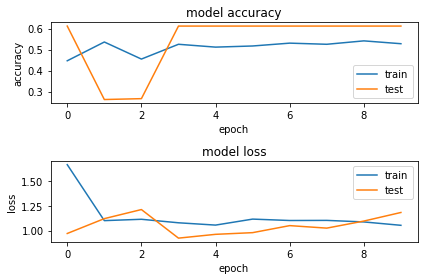

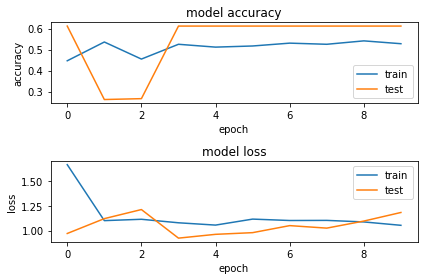

In [113]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [120]:
from tensorflow.keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 224, 224, 3)
X_train: (487, 224, 224, 3)
y_train: (487,)
Y_train: (487, 4)


In [124]:
ids = list(set(labels.ID))


random.shuffle(ids)
ids_train = ids[:123]
ids_test = ids[123:]
tr_len = len(ids_train)
ts_len = len(ids_test)
print('Train Length:',tr_len)
print('Test Length:',ts_len)

X_train = np.zeros([369,224,224,3])
y_train = []
for n, ID in enumerate(ids_train):
    y_train = y_train + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_train[3*n+i,:,:,:] = preprocess(tmp)
y_train=np.array(y_train)

print(len(y_train))

X_test = np.zeros([240,224,224,3])
y_test = []
for n, ID in enumerate(ids_test):
    y_test = y_test + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_test[3*n+i,:,:,:] = preprocess(tmp)
y_test=np.array(y_test)
print(len(y_test))

NUM_LABELS=4
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

Train Length: 123
Test Length: 80
369
240


In [126]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [133]:
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


I TRIED TO RUN IT FOR 20 MINS BUT IT FAILED AND OVERFLOWED

In [134]:
train_target = Y_train
val_target = Y_test

In [135]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(4, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, train_target, epochs=40, batch_size=128, validation_data=(vgg_features_val, val_target))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_31 (Dense)            (None, 100)               2508900   
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_32 (Dense)            (None, 4)                 404       
                                                                 
Total params: 2,509,704
Trainable params: 2,509,504
Non-trainable params: 200
_________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


3/3 [==============================] - 1s 502ms/step - loss: 1.5415 - accuracy: 0.2385 - val_loss: 1.2729 - val_accuracy: 0.3000
Epoch 2/40
3/3 [==============================] - 1s 392ms/step - loss: 1.4146 - accuracy: 0.2818 - val_loss: 1.2805 - val_accuracy: 0.3000
Epoch 3/40
3/3 [==============================] - 1s 293ms/step - loss: 1.3831 - accuracy: 0.3008 - val_loss: 1.2085 - val_accuracy: 0.3000
Epoch 4/40
3/3 [==============================] - 1s 339ms/step - loss: 1.3709 - accuracy: 0.3035 - val_loss: 1.1519 - val_accuracy: 0.5500
Epoch 5/40
3/3 [==============================] - 1s 305ms/step - loss: 1.3458 - accuracy: 0.3198 - val_loss: 1.1307 - val_accuracy: 0.5500
Epoch 6/40
3/3 [==============================] - 1s 367ms/step - loss: 1.3268 - accuracy: 0.3550 - val_loss: 1.1237 - val_accuracy: 0.5500
Epoch 7/40
3/3 [==============================] - 1s 357ms/step - loss: 1.3157 - accuracy: 0.3848 - val_loss: 1.1356 - val_accuracy: 0.5500
Epoch 8/40
3/3 [===============

In [136]:
model2.evaluate(vgg_features_val,val_target)

8/8 [==============================] - 0s 15ms/step - loss: 1.0515 - accuracy: 0.5500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[1.051528811454773, 0.550000011920929]

THE ONE TIME I WAS ABLE TO RUN IT I GOT THIS OUTPUT BUT AFTER CORRECTING THE CODE AND RUNNING IT. I COULD NOT RERUN IT